## General requirements for the assignment
- Make appropriate comments to your code
- Use Markdown cells to provide your answers (when applicable)
- Add your code when there is the comment "YOUR CODE HERE".
- Stick to Pep8 standard as much as possible for your coding
- Submit through GitHub
- Tag the commit as *Final submission of Assignment 1*
- Post (interesting) errors in the course Github's issue page
  
## Assignment Intro
In this assignment, you will be working with data imports. Data is provided to you both to be downloaded locally and accessed remotely. The final deliverable for the assignment is this ipython notebook with the executed cells active and submitted through your personal GitHub accounts. You will be importing data, conduct some basic data exploration and finally exporting the data and saving it for future use.  

You will be working with this data for the other two GO/NOGO assignments as well. The data is from the Google mobility report. You can find more information about this data here: <https://www.google.com/covid19/mobility/data_documentation.html?hl=en>.

### DEADLINE FOR THIS ASSIGNMENT IS 17 SEPTEMBER 2021 BEFORE 23:59

<hr />


## Import libraries
Update this list as you go along with the assignment

In [23]:
import numpy as np
import pandas
import os
import matplotlib.pyplot as plt


# import libraries


# PART I - Data Import and Export

#### 1. Download mobility data from this [link](https://www.google.com/covid19/mobility/), choose *Region CSVs*. From the downloaded data, pick a country to work with. Why did you choose this country?

Picked the Netherlands, because I'm familiar with the dates changes may occur.

In [2]:
# path to the downloaded data folder, e.g. 'Downloads/Region_Mobility_Report_CSVs/'
data_dir = '/Users/Daan/Downloads/Region_Mobility_Report_CSVs/'
country_code = 'NL'

#### 2. Find the path to the data of your selection. We have prepared some sample code. You need to fill in some parts indicated by 'YOUR CODE HERE'.

In [3]:
all_files = os.listdir(data_dir)
# initilisation
target_file_name = ''
year = '2020'

for file_name in all_files:
    # check if this file is for 2020
    is_year = year
    # if yes, we check if the file name is for the country that you select
    if is_year:
        # check if the country_code is in the file_name
        is_country = country_code
        if is_country:
            # found the file, save it to 'target_file_name'
            # added stated year and country code to standard file name in directory
            target_file_name = '%s_%s_Region_Mobility_Report.csv' % (year, country_code)
            # we stop looking by breaking out of the for loop
            break

if not target_file_name:
    print('File not found. Check your country code (or select a different one)!')
else:
    print('Found file name is: ' + target_file_name)
    # get the path to the file
    file_path = '%s%s' % (data_dir, target_file_name)
    print('Path to the file is: ' + file_path)

Found file name is: 2020_NL_Region_Mobility_Report.csv
Path to the file is: /Users/Daan/Downloads/Region_Mobility_Report_CSVs/2020_NL_Region_Mobility_Report.csv


#### 3. Import the 2020 data for this country as a pandas data frame and name it as `df_2020`. Print the first 10 lines of `df_2020`

In [4]:
# import and read .csv-file
df_2020 = pandas.read_csv(file_path)

df_2020.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0
5,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-20,1.0,-1.0,-5.0,-3.0,-6.0,1.0
6,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-21,8.0,4.0,22.0,1.0,-9.0,0.0
7,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-22,1.0,-2.0,-2.0,10.0,-4.0,0.0
8,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-23,1.0,-11.0,-26.0,2.0,-3.0,0.0
9,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-24,9.0,-7.0,4.0,-4.0,-21.0,3.0


#### We have also stored the data in a remote server. The data for a particular country can be retrieved with the following API:
`http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/{yy}/{CC}` 
#### where yy is either 2020 or 2021, and CC is a 2-letter country code. For example, to get data for 2020 for the Netherlands, the API will be: <http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/2020/NL>


#### 4. Download the mobility report data of **2021** for the same country (that you have chosen above) using this API and name it as `df_2021`.  Print the first 10 lines of the dataframe

In [5]:
# creating possibility of variable year and country
yy = '2021'
cc = country_code

# stating URL
URL_import = 'http://mirrors-dev.citg.tudelft.nl:8083/google-mobility-data/%s/%s' % (yy, cc)

# import and read .csv-file
df_2021 = pandas.read_csv(URL_import)
df_2021.head(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-01,-79.0,-77.0,5.0,-75.0,-83.0,24.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-02,-65.0,-17.0,0.0,-59.0,-22.0,12.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-03,-62.0,-19.0,3.0,-56.0,-12.0,8.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-04,-52.0,-12.0,-23.0,-62.0,-41.0,16.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-05,-52.0,-8.0,-8.0,-61.0,-41.0,16.0
5,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-06,-53.0,-9.0,-2.0,-58.0,-37.0,15.0
6,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-07,-58.0,-15.0,-32.0,-62.0,-39.0,17.0
7,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-08,-55.0,-9.0,0.0,-57.0,-35.0,15.0
8,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-09,-59.0,-9.0,19.0,-52.0,-12.0,10.0
9,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2021-01-10,-60.0,-14.0,23.0,-52.0,-9.0,7.0


#### 5. Combine the two dataframes `df_2020` and `df_2021` into a new dataframe `df`. Print the last 10 lines of `df`.

In [6]:
# combine dataframes, ignoring index
df = pandas.concat([df_2020, df_2021], 
                   ignore_index=True)

df.tail(10)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
198780,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-23,NaN,NaN,NaN,NaN,-29.0,4.0
198781,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-24,NaN,NaN,NaN,NaN,-24.0,3.0
198782,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-25,NaN,NaN,NaN,NaN,-29.0,4.0
198783,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-26,NaN,NaN,NaN,NaN,-29.0,6.0
198784,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-27,NaN,NaN,NaN,NaN,-23.0,3.0
198785,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-28,NaN,NaN,311.0,NaN,NaN,NaN
198786,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-29,NaN,NaN,237.0,NaN,NaN,NaN
198787,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-30,NaN,NaN,NaN,NaN,-20.0,4.0
198788,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-08-31,NaN,NaN,NaN,NaN,-15.0,3.0
198789,NL,Netherlands,Zeeland,Veere,NaN,NaN,NaN,ChIJa7uf-GcjxEcRpGJlbS6aq8s,2021-09-01,NaN,NaN,NaN,NaN,-19.0,3.0


#### 6. `df` now contains mobility data for your selected country from 2020 and 2021. There are three aggregation levels to this data, namely national (`country_region`), provincial (`sub_region_1`), and city (`sub_region_2`). Separate these data into three different dataframes, namely `df_nation`, `df_province`, and `df_city`.  Print the first 5 lines of each of them.  

Hint:
- For the national data, `sub_region_1` and `sub_region_2` are NaN.
- For the provincial data, `sub_region_2` is NaN.
- For the city data, `country_region`, `sub_region_1` and `sub_region_2` are not NaN.
- Logical operators: <https://realpython.com/python-bitwise-operators/>
- Use pandas [isna()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html) function 

In [7]:
# YOUR CODE HERE

nation   = df['sub_region_1'].isna()  & df['sub_region_2'].isna()  & df['country_region'].notna()
province = df['sub_region_1'].notna() & df['sub_region_2'].isna()  & df['country_region'].notna()
city     = df['sub_region_1'].notna() & df['sub_region_2'].notna() & df['country_region'].notna()

df_nation   = df[nation]
df_province = df[province]
df_city     = df[city]

df_nation.head(5).append(
    df_province.head(5), ignore_index = True).append(
    df_city.head(5), ignore_index = True)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-15,1.0,1.0,11.0,3.0,0.0,0.0
1,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-16,-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-17,0.0,-1.0,8.0,-3.0,-5.0,1.0
3,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-18,5.0,4.0,21.0,-3.0,-5.0,1.0
4,NL,Netherlands,NaN,NaN,NaN,NaN,NaN,ChIJu-SH28MJxkcRnwq9_851obM,2020-02-19,3.0,0.0,20.0,-3.0,-5.0,1.0
5,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-15,-6.0,0.0,18.0,6.0,1.0,0.0
6,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-16,-10.0,-10.0,-38.0,-12.0,-2.0,1.0
7,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-17,3.0,-2.0,52.0,-24.0,-22.0,3.0
8,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-18,8.0,0.0,45.0,-21.0,-22.0,3.0
9,NL,Netherlands,Drenthe,NaN,NaN,NL-DR,NaN,ChIJJe9hK-IhyEcRMK4d-ISmq2o,2020-02-19,4.0,-4.0,49.0,-19.0,-22.0,2.0


#### 7. Save `df_nation`, `df_province`, and `df_city` into csv files under folder 'processed_data', and locate this folder under `data_dir`. Name the files `{CC}_nation.csv`, `{CC}_province.csv`, and `{CC}_city.csv`, respectively. `{CC}` stands for your selected country code.

In [8]:
# creating new directory
new_folder     = 'Processed Data'
directory_name = '%s%s/' % (data_dir, new_folder)
os.mkdir(directory_name)

FileExistsError: [Errno 17] File exists: '/Users/Daan/Downloads/Region_Mobility_Report_CSVs/Processed Data/'

In [9]:
# naming files
nation_file   = '%s%s_nation.csv' % (directory_name, country_code)
province_file = '%s%s_province.csv' % (directory_name, country_code)
city_file     = '%s%s_city.csv' % (directory_name, country_code)

# saving files
df_nation.to_csv('%s' % (nation_file))
df_province.to_csv('%s' % (province_file))
df_city.to_csv('%s' % (city_file))

<hr />

# PART II - Simple Data Processing

#### 1. There are multiple activities in the mobility report such as workplaces, parks, transit stations, etc. For each of the activities, what are the average percent changes from baselines for your selected country?

In [10]:
# YOUR CODE HERE

# only regarding nation-wide: 'df_nation'

# activities:
    # column 1: text
    # column 2: column name

activities = [['retail and recreation',
               'grocery and pharmacy',
               'parks',
               'transit stations',
               'workplaces',
               'residential'],
              ['retail_and_recreation_percent_change_from_baseline',
               'grocery_and_pharmacy_percent_change_from_baseline',
               'parks_percent_change_from_baseline',
               'transit_stations_percent_change_from_baseline',
               'workplaces_percent_change_from_baseline',
               'residential_percent_change_from_baseline']]


for i in range(len(activities[0])):
    # defining mean value
    mean = df_nation['%s' % (activities[1][i])].mean()
    
    # print values
    print('Average change in %s: %.1f%%' % (activities[0][i], mean))

Average change in retail and recreation: -21.0%
Average change in grocery and pharmacy: -1.1%
Average change in parks: 75.0%
Average change in transit stations: -40.8%
Average change in workplaces: -25.2%
Average change in residential: 8.4%


#### 2. Let's look into data from different provinces. How many provinces are there in the data of your selected country? Print all of them.

In [11]:
# YOUR CODE HERE

provinces = df_province['sub_region_1'].unique()
country   = df_province['country_region'].iloc[0]

print('There are %d provinces in the %s.' % (len(provinces), country))
print('')
print('Provinces:')

for i in range(len(provinces)):
    print(provinces[i])

There are 12 provinces in the Netherlands.

Provinces:
Drenthe
Flevoland
Friesland
Gelderland
Groningen
Limburg
North Brabant
North Holland
Overijssel
South Holland
Utrecht
Zeeland


#### 3. You can get a summary of each of the provinces using pandas describe function. Using this, find which province experienced the largest (average) changes in workplaces.

Did not understand how to plot describe function per province individually at the same time. Created list of largest average change in an other way. Added Drenthe as example .describe() plot.

In [16]:
# define dataframe with only workplace changes and provinces
df_wp = df_province[['sub_region_1', 'workplaces_percent_change_from_baseline']]

means = []

print('Avereage change in workplaces per province:')

max_mean = 0

for i in range(len(provinces)):
    # choose province
    is_province = df_wp['sub_region_1'] == provinces[i]
    
    # find mean and store in means
    mean = df_wp[is_province].mean()[0]
    means.append(mean)
    
    print('%s: %.2f%%' % (provinces[i], mean))
    
    if abs(mean) > abs(max_mean):
        max_mean = mean
        max_province = provinces[i]

# print larges average change
print('')
print('Largest mean change is: %.2f%% in %s' % (max_mean, max_province))

is_drenthe = df_province['sub_region_1'] == 'Drenthe'
df_province[is_drenthe].describe()

Avereage change in workplaces per province:
Drenthe: -22.60%
Flevoland: -26.53%
Friesland: -21.83%
Gelderland: -21.25%
Groningen: -25.41%
Limburg: -21.72%
North Brabant: -24.28%
North Holland: -29.62%
Overijssel: -22.41%
South Holland: -26.94%
Utrecht: -29.81%
Zeeland: -20.37%

Largest mean change is: -29.81% in Utrecht


,metro_area,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
count,0.0,0.0,564.000000,565.000000,532.000000,559.000000,562.000000,565.000000
mean,NaN,NaN,-10.418440,3.423009,124.605263,-30.350626,-22.597865,6.743363
std,NaN,NaN,26.393162,14.306046,124.768162,18.949247,19.245349,4.538993
min,NaN,NaN,-83.000000,-85.000000,-60.000000,-73.000000,-83.000000,-3.000000
25%,NaN,NaN,-31.000000,-3.000000,27.000000,-41.000000,-35.000000,4.000000
50%,NaN,NaN,-10.000000,3.000000,83.500000,-33.000000,-24.000000,7.000000
75%,NaN,NaN,10.000000,12.000000,194.250000,-21.000000,-5.250000,9.000000
max,NaN,NaN,56.000000,34.000000,559.000000,53.000000,29.000000,24.000000


#### 4. Create a new dataframe that only contains data from the province with the largest changes in workplaces, which you found in the previous question.

In [17]:
# filter on province with largest change

is_max_province = df_province['sub_region_1'] == max_province
df_max_province = df_province[is_max_province]

df_max_province.head(5)

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
98786,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-15,8.0,0.0,3.0,9.0,-1.0,0.0
98787,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-16,-5.0,-10.0,-22.0,14.0,-3.0,1.0
98788,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-17,2.0,-1.0,2.0,3.0,1.0,0.0
98789,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-18,4.0,3.0,12.0,0.0,2.0,0.0
98790,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-19,6.0,-1.0,12.0,-2.0,1.0,0.0


#### 5. We're going to look at the changes of this province over time. As you can see, the column date is in string format. Convert this str date column data str to datetime format and append as an extra column called 'date2' to the dataframe.  
Hint: <https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html>

In [18]:
# convert dates
column_date2 = pandas.to_datetime(df_max_province['date'])

# append column to dataframe
df_max_province = df_max_province.assign(date2 = column_date2.values)

df_max_province

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,date2
98786,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-15,8.0,0.0,3.0,9.0,-1.0,0.0,2020-02-15
98787,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-16,-5.0,-10.0,-22.0,14.0,-3.0,1.0,2020-02-16
98788,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-17,2.0,-1.0,2.0,3.0,1.0,0.0,2020-02-17
98789,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-18,4.0,3.0,12.0,0.0,2.0,0.0,2020-02-18
98790,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2020-02-19,6.0,-1.0,12.0,-2.0,1.0,0.0,2020-02-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189745,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2021-08-28,-8.0,-1.0,50.0,-22.0,2.0,0.0,2021-08-28
189746,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2021-08-29,0.0,2.0,22.0,-16.0,9.0,1.0,2021-08-29
189747,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2021-08-30,10.0,8.0,66.0,-41.0,-41.0,9.0,2021-08-30
189748,NL,Netherlands,Utrecht,NaN,NaN,NL-UT,NaN,ChIJPzM8M01oxkcRsFwejVreAAM,2021-08-31,7.0,11.0,90.0,-38.0,-36.0,8.0,2021-08-31


#### 6. Sort the data in ascending order of time and save it as 'df_province_largest'

In [20]:
df_province_largest = df_max_province.sort_values('date2', 
                            ascending = True)


# save file to directory
province_largest_file = '%sdf_province_largest.csv' % directory_name

df_province_largest.to_csv('%s' % (province_largest_file))

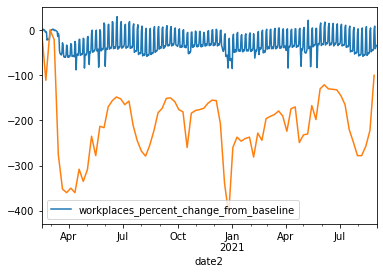

In [28]:
# Execute the cell with the following command to visualize the results
df_province_largest.plot('date2', 'workplaces_percent_change_from_baseline')

df_province_largest.resample('7D', on='date2').sum()['workplaces_percent_change_from_baseline'].plot();

#### 7. Compare the results above with the results in the google mobility report pdf of your selected province. Discuss the differences and similarities. Please save the mobility report pdf that you use to compare the results with! An example mobility report pdf can be found [here](https://www.gstatic.com/covid19/mobility/2021-09-01_AW_Mobility_Report_en.pdf)

[used report](https://www.gstatic.com/covid19/mobility/2021-09-10_NL_Utrecht_Mobility_Report_nl.pdf)

Average more or less the same.